In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("C:\\Users\\Anastasiia\\Downloads\\archive (3)\\ab_data.csv")

In [13]:
df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


## The dataset contains 294,478 entries and 5 columns:

- user_id: A unique identifier for each user.
- timestamp: The time when the data point was collected.
- group: Indicates whether the user was in the control group or the treatment group.
- landing_page: The page the user landed on (either the old page or the new page).
- converted: Indicates whether the user converted (1 for conversion, 0 for no conversion).


### Hypotheses to analyze:
- Null Hypothesis (H0): The new landing page has no effect on the conversion rate compared to the old page.
- Alternative Hypothesis (H1): The new landing page has a different (better or worse) conversion rate compared to the old page.

In [21]:
# Check for mismatches between 'group' and 'landing_page'
mismatched_data = df[((df['group'] == 'treatment') & (df['landing_page'] != 'new_page')) |
                          ((df['group'] == 'control') & (df['landing_page'] != 'old_page'))]

# Display the number of mismatches and a sample of the mismatched rows
mismatched_data_count = mismatched_data.shape[0]
mismatched_data_sample = mismatched_data.head()

mismatched_data_count, mismatched_data_sample


(3893,
      user_id                   timestamp      group landing_page  converted
 22    767017  2017-01-12 22:58:14.991443    control     new_page          0
 240   733976  2017-01-11 15:11:16.407599    control     new_page          0
 308   857184  2017-01-20 07:34:59.832626  treatment     old_page          0
 327   686623  2017-01-09 14:26:40.734775  treatment     old_page          0
 357   856078  2017-01-12 12:29:30.354835  treatment     old_page          0)

In [25]:
# Remove mismatched data
clean_ab_data = df[((df['group'] == 'treatment') & (df['landing_page'] == 'new_page')) |
                        ((df['group'] == 'control') & (df['landing_page'] == 'old_page'))]

# Calculate conversion rates for each group
conversion_rates = clean_ab_data.groupby('group')['converted'].mean()

conversion_rates


group
control      0.120386
treatment    0.118807
Name: converted, dtype: float64

The conversion rates for each group are as follows:

- Control group (old page): 12.04%
- Treatment group (new page): 11.88%
 
#### At first glance, the new page appears to have a slightly lower conversion rate than the old page. However, this difference may or may not be statistically significant.

In [28]:
from statsmodels.stats.proportion import proportions_ztest

# Count the number of conversions and total users in each group
control_converted = clean_ab_data[clean_ab_data['group'] == 'control']['converted'].sum()
treatment_converted = clean_ab_data[clean_ab_data['group'] == 'treatment']['converted'].sum()

control_total = clean_ab_data[clean_ab_data['group'] == 'control'].shape[0]
treatment_total = clean_ab_data[clean_ab_data['group'] == 'treatment'].shape[0]

# Perform two-tailed z-test
z_stat, p_value = proportions_ztest([control_converted, treatment_converted], [control_total, treatment_total])

z_stat, p_value


(1.3116075339133115, 0.18965258971881804)

The results of the two-tailed z-test are as follows:

- Z-statistic: 1.31
- P-value: 0.19
  
Since the p-value is greater than the common significance level of 0.05, we fail to reject the null hypothesis. This means that there is no statistically significant difference between the conversion rates of the old and new pages.

Thus, the data suggests that the new landing page does not perform better (or worse) than the old page in terms of conversion rate.

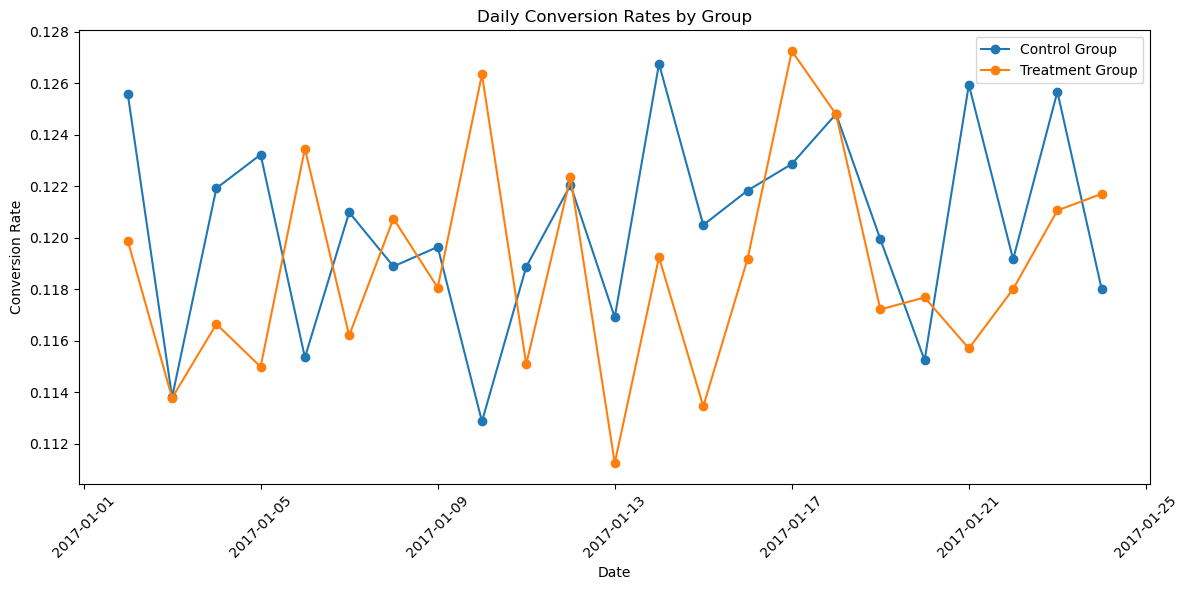

In [35]:
# Plot the daily conversion rates
plt.figure(figsize=(12, 6))
plt.plot(daily_conversion.index, daily_conversion['control'], label='Control Group', marker='o')
plt.plot(daily_conversion.index, daily_conversion['treatment'], label='Treatment Group', marker='o')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.title('Daily Conversion Rates by Group')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



C:\Users\Anastasiia\AppData\Local\Temp\ipykernel_24900\1178332628.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_ab_data['timestamp'] = pd.to_datetime(clean_ab_data['timestamp'])
C:\Users\Anastasiia\AppData\Local\Temp\ipykernel_24900\1178332628.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_ab_data['week'] = clean_ab_data['timestamp'].dt.isocalendar().week


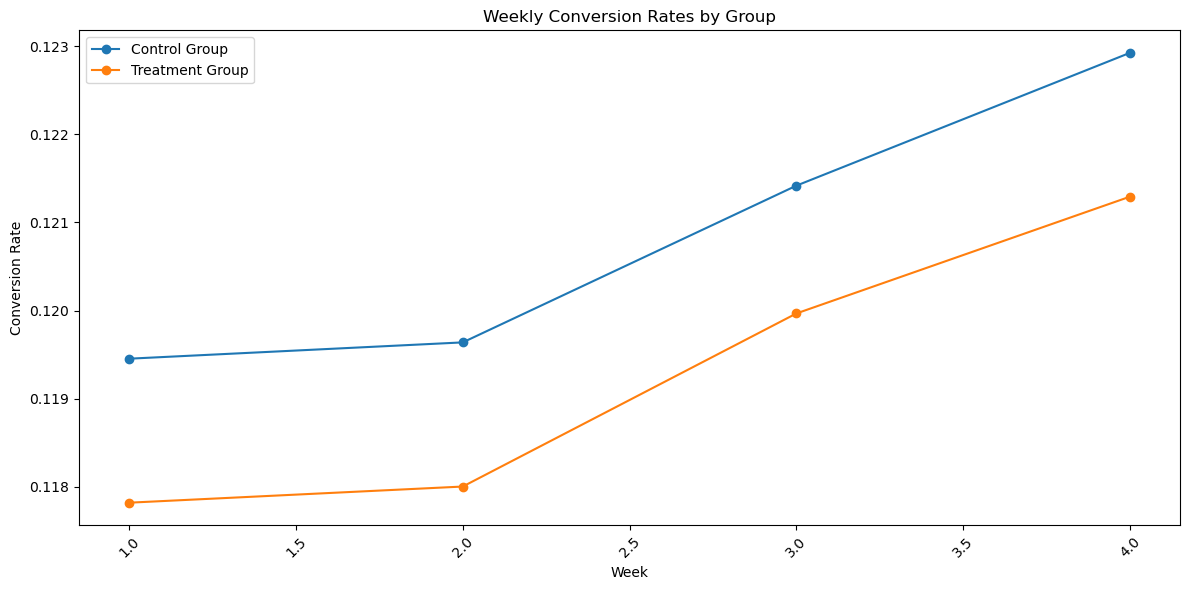

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Переводим timestamp в формат даты и времени
clean_ab_data['timestamp'] = pd.to_datetime(clean_ab_data['timestamp'])

# Добавляем колонку с неделями
clean_ab_data['week'] = clean_ab_data['timestamp'].dt.isocalendar().week

# Группируем по неделям и считаем конверсии
weekly_conversion = clean_ab_data.groupby(['week', 'group'])['converted'].mean().unstack()

# Строим график конверсий по неделям
plt.figure(figsize=(12, 6))
plt.plot(weekly_conversion.index, weekly_conversion['control'], label='Control Group', marker='o')
plt.plot(weekly_conversion.index, weekly_conversion['treatment'], label='Treatment Group', marker='o')
plt.xlabel('Week')
plt.ylabel('Conversion Rate')
plt.title('Weekly Conversion Rates by Group')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [45]:
# Perform z-test for each week to check statistical significance of conversion differences
weekly_results = []

for week in weekly_conversion.index:
    # Subset of data for the current week
    week_data = clean_ab_data[clean_ab_data['week'] == week]
    
    # Count conversions and total for both groups
    control_week_converted = week_data[week_data['group'] == 'control']['converted'].sum()
    treatment_week_converted = week_data[week_data['group'] == 'treatment']['converted'].sum()
    
    control_week_total = week_data[week_data['group'] == 'control'].shape[0]
    treatment_week_total = week_data[week_data['group'] == 'treatment'].shape[0]
    
    # Perform z-test for this week
    z_stat, p_value = proportions_ztest([control_week_converted, treatment_week_converted], 
                                        [control_week_total, treatment_week_total])
    
    weekly_results.append((week, z_stat, p_value))

# Convert results to DataFrame for better visualization
weekly_test_results = pd.DataFrame(weekly_results, columns=['Week', 'Z-statistic', 'P-value'])

print(weekly_test_results)



   Week  Z-statistic   P-value
0     1     0.735812  0.461845
1     2     0.768587  0.442139
2     3     0.675769  0.499187
3     4     0.359109  0.719514


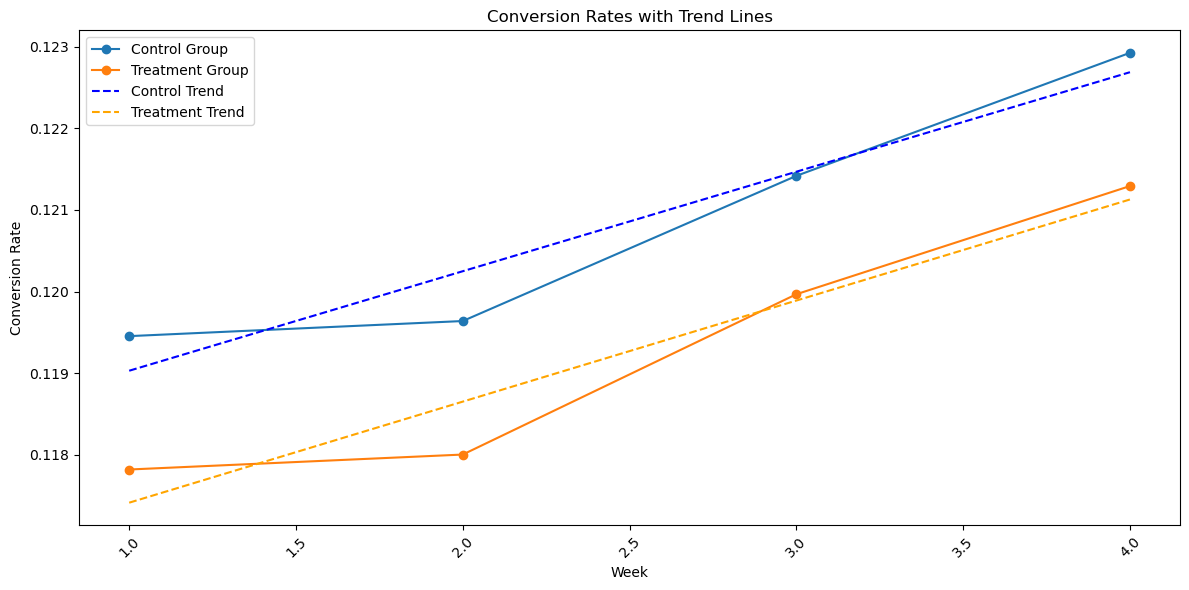

In [47]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data for linear regression
weekly_conversion.reset_index(inplace=True)

# Define X (weeks) and y (conversion rates) for both groups
X = np.array(weekly_conversion['week']).reshape(-1, 1)

# Linear regression for control group
y_control = weekly_conversion['control']
model_control = LinearRegression()
model_control.fit(X, y_control)
trend_control = model_control.predict(X)

# Linear regression for treatment group
y_treatment = weekly_conversion['treatment']
model_treatment = LinearRegression()
model_treatment.fit(X, y_treatment)
trend_treatment = model_treatment.predict(X)

# Plot the results with the trend lines
plt.figure(figsize=(12, 6))
plt.plot(weekly_conversion['week'], weekly_conversion['control'], label='Control Group', marker='o')
plt.plot(weekly_conversion['week'], weekly_conversion['treatment'], label='Treatment Group', marker='o')
plt.plot(weekly_conversion['week'], trend_control, label='Control Trend', linestyle='--', color='blue')
plt.plot(weekly_conversion['week'], trend_treatment, label='Treatment Trend', linestyle='--', color='orange')
plt.xlabel('Week')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rates with Trend Lines')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### A/B Test Summary and Conclusions
*Conversion Rates:*

- The overall conversion rate for the control group (old page) is 12.04%.
- The conversion rate for the treatment group (new page) is 11.88%.
- The difference between these rates is small, with the control group slightly outperforming the treatment group.

  
*Statistical Significance:*
- We performed a two-tailed z-test on the entire dataset, which yielded a p-value of 0.19. Since the p-value is greater than 0.05, the result is not statistically significant. This means we fail to reject the null hypothesis and cannot conclude that the new page performs differently (better or worse) than the old page.

  
*Time-Based Analysis:*
- When we segmented the data by weeks, we observed an upward trend in conversion rates over time for both groups. However, the weekly A/B tests for statistical significance also yielded p-values greater than 0.05, indicating no statistically significant difference between the two groups for any individual week.

  
*Trend Analysis:*
- Using linear regression to model trends over time, both the control and treatment groups showed positive trends in conversion rates. However, the control group consistently outperformed the treatment group across all weeks.

  
*Conclusion:*
The A/B test results suggest that the new page does not significantly outperform the old page in terms of conversion rate. While there was a slight upward trend in conversions over time for both pages, the difference between the groups was not statistically significant. Based on this analysis, there is no evidence to support switching to the new page at this time, as the old page performs marginally better in the test.